In [ ]:

pip install plotly


DEPRECATION: Loading egg at /home/jo_shepton/miniconda3/envs/py3/lib/python3.11/site-packages/gpz_pype-0.1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/df/79/c80174d711ee26ee5da55a9cc3e248f1ec7a0188b5e4d6bbbbcd09b974b0/plotly-5.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 13.4 MB/s eta 0:00:0000:0100:01


In [18]:
import numpy as np
import re
import statistics as stat
import matplotlib.pyplot as plt
import math
import scipy
from scipy import stats
import statsmodels.distributions.empirical_distribution as edf
import statistics

In [2]:
spec_z=[]
with open('gpzpp/example/sdss_pred_randomised_cut.cat','r') as file_spec:
    for _ in range(1):
        next(file_spec)
    for line_spec in file_spec:
        test_spec = re.sub("\s+", ",", line_spec.strip()) #takes any spaces and replaces with comma to make split easier
        tokens_spec = test_spec.split(',')
        #print(tokens[4])
        spec_z.append(tokens_spec[10])


In [26]:
print(np.linspace(100,500,9))

[100. 150. 200. 250. 300. 350. 400. 450. 500.]


In [57]:
for nbf in np.linspace(10,100,4, dtype=int):
    delta_z = []
    outliers = []
    j=0
    phot_z =[]
    uncert = []
    with open(f'MPhys/parameter_files/gpz_{nbf}_seq_cut.cat','r') as file:
        for _ in range(11):
            next(file)
        for line in file:
            test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
            tokens = test.split(',')
            #print(tokens[4])
            phot_z.append(float(tokens[0]))
            uncert.append(float(tokens[1]))

    for i in range(len(phot_z)):
        delta_z.append(abs(float(phot_z[i])-float(spec_z[i])))
        outliers.append(float(delta_z[i])/(1+float(spec_z[i])))
        
        if abs(outliers[i])>0.15:
            j+=1
    outlier_frac = j/len(spec_z)
    sig_nmad = (scipy.stats.median_abs_deviation(outliers))
    sig_nmad_2 = 1.48*(np.median(outliers))
    with open(f'MPhys/sig_nmad_seq_cut_MAD_test.txt', 'a') as file_sig:
        if nbf == 100:
            file_sig.write('NUMBF'+'    '+'sig_nmad'+'    '+'outlier_frac'+'\n')
        file_sig.write(str(nbf)+','+ str(sig_nmad)+','+str(outlier_frac)+'\n')
file_sig.close()

500
0.025782638657550986
0.02334990050722129


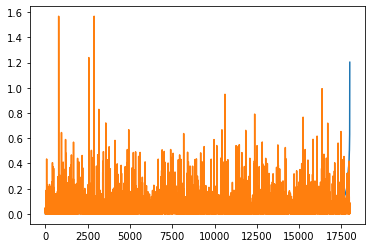

In [80]:
for nbf in [100]:#np.linspace(100,500,9, dtype=int):
    #sig = []
    delta_z = []
    outliers = []
    j=0
    phot_z =[]
    n=[]
    c=[]
    f=[]
    uncert=[]
    with open(f'MPhys/parameter_files/gpz_{nbf}_seq_cut.cat','r') as file:
        for _ in range(11):
            next(file)
        for line in file:
            test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
            tokens = test.split(',')
            #print(tokens[4])
            phot_z.append(float(tokens[0]))
            uncert.append(float(tokens[1]))

    for i in range(len(phot_z)):
        delta_z.append(float(phot_z[i])-float(spec_z[i]))
        outliers.append(float(delta_z[i])/(1+float(spec_z[i])))
    
        if outliers[i]>0.15:
            j+=1
    outlier_frac = j/len(spec_z)
    sig_nmad = 1.48*(np.median(outliers))

    for j in range(len(delta_z)):
        n.append(float(-delta_z[j])/(uncert[j]*np.sqrt(2)))
        c.append(np.abs(math.erf(n[j])))
    
    print(np.mean(c))
    plt.ecdf(c, color ='k')
    plt.xlabel('c')
    plt.ylabel('F(c)')
    plt.title(f'Diagonal Covarience')
    x = np.linspace(0,1,10)

    plt.plot(x,x,linestyle = '--', color = 'grey', alpha= 0.5)
    plt.savefig('MPhys/parameter_plots/dia_cov_seq_cut_ecdf.png', bbox_inches='tight')
    plt.close()
#f = scipy.stats.ecdf(c)
#sample_edf = edf.ECDF(c)
#print(sample_edf.y)

#print(sig)
#plt.plot(sample_edf.y)

 #   with open(f'MPhys/sig_nmad.txt', 'a') as file_sig:
  #      file_sig.write(str(nbf)+','+ str(sig_nmad)+','+str(outlier_frac)+'\n')
    #print(sig_nmad)


0.4069103045788999


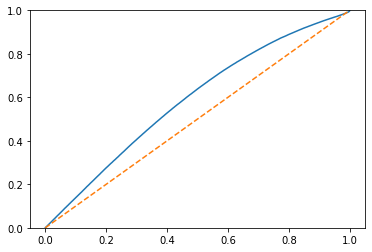

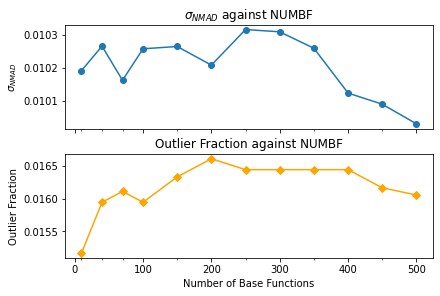

In [76]:
file_nmad = open('MPhys/sig_nmad_seq_cut_MAD_test.txt','r')
numbf=[]
sig_nmad=[]
outlier_new=[]
for _ in range(1):
    next(file_nmad)
for line in file_nmad:
    split = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
    tokens = split.split(',')
    #print(tokens[4])
    numbf.append(float(tokens[0]))
    sig_nmad.append(float(tokens[1]))
    outlier_new.append(float(tokens[2]))
fig,axs= plt.subplots(2,1, sharex =True, constrained_layout = True)
#print(sig_nmad)
y_tix = np.linspace(np.min(sig_nmad),np.max(sig_nmad),len(sig_nmad))
axs[0].plot(numbf,sig_nmad, marker = 'o')
axs[0].set_title(''r'$\sigma_{NMAD}$ against NUMBF')
axs[1].set_xlabel('Number of Base Functions')
axs[0].set_ylabel(''r'$\sigma_{NMAD}$')
axs[0].set_xticks(numbf, minor=True)
axs[1].plot(numbf,outlier_new, color='orange', marker = 'D')
axs[1].set_title('Outlier Fraction against NUMBF')
axs[1].set_ylabel('Outlier Fraction')
#ax.invert_yaxis()
fig.savefig('MPhys/parameter_plots/sigma_NMAD_seq_cut_MAD_test.png', bbox_inches='tight')

In [ ]:
##quantifying errors
